<a href="https://colab.research.google.com/github/anagha1112/Movie_Review_Scraping_analysis_classification/blob/main/Netflix_Content_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In this analysis Tthe primary aim is to understand Netflix’s content strategy by analyzing:**


* Does content type (movies vs. TV shows) influence viewership ?
* Does Language of content make more viewership?
* Does any specific month makes more viewership?
* Does any particular season make more viewership?
* Does any day of the week make more viewership?
* Does any particular holidays of the year make more viewership?
* Analyse top viewed content and what languages are they from?



In [ ]:
import pandas as pd
import os
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("mohamedfawzy911/netflix-content-strategy-case-study")

print("Path to dataset files:", path)

# List files in the dataset folder to see the CSVs available
files = os.listdir(path)
print("Files:", files)

# Assuming one of the files is called 'netflix_titles.csv' (adjust as needed)
csv_file = [f for f in files if f.endswith('.csv')][0]  # get the first CSV file
csv_path = os.path.join(path, csv_file)

# Load into a DataFrame
df = pd.read_csv(csv_path)


Path to dataset files: /kaggle/input/netflix-content-strategy-case-study
Files: ['netflix_content_2023.csv']


In [ ]:
#by using head() it helps you quickly look at the structure of your data
df.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,"62,28,00,000",Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,"50,77,00,000",English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"50,30,00,000",English,Movie


In [ ]:
#to find data types of each columns
df.dtypes

,0
Title,object
Available Globally?,object
Release Date,object
Hours Viewed,object
Language Indicator,object
Content Type,object


In [ ]:
#means all columns are object data type

In [ ]:
#to see the shape of data frame use shape
df.shape

(24812, 6)

In [ ]:
#means - 24812 rows and 6 columns in the dataset

In [ ]:
#to see some overall info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                24812 non-null  object
 1   Available Globally?  24812 non-null  object
 2   Release Date         8166 non-null   object
 3   Hours Viewed         24812 non-null  object
 4   Language Indicator   24812 non-null  object
 5   Content Type         24812 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


In [ ]:
#change object type hours viewed to float
df['Hours Viewed'] = df['Hours Viewed'].str.replace(',','',regex=True).astype(float)
df.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000.0,Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,507700000.0,English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000.0,English,Movie


<Axes: xlabel='Content Type', ylabel='Hours Viewed'>

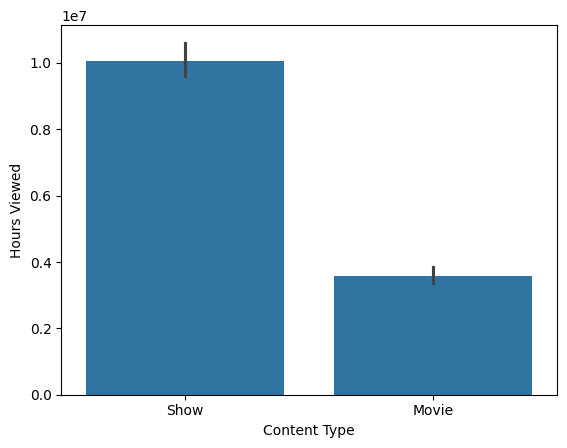

In [ ]:
#check how show vs movies influence viewership
import seaborn as sns
sns.barplot(x='Content Type',y='Hours Viewed',data = df)

In [ ]:
#so shows have a higher viewership than movies

In [ ]:
#now lets check which are top 10 the highest viewed contents
df.nlargest(10,'Hours Viewed')

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show
18227,King the Land: Limited Series // 킹더랜드: 리미티드 시리즈,Yes,2023-06-17,630200000.0,Korean,Movie
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000.0,Korean,Show
18214,ONE PIECE: Season 1,Yes,2023-08-31,541900000.0,English,Show
3,Wednesday: Season 1,Yes,2022-11-23,507700000.0,English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000.0,English,Movie
5,You: Season 4,Yes,2023-02-09,440600000.0,English,Show
6,La Reina del Sur: Season 3,No,2022-12-30,429600000.0,English,Show
7,Outer Banks: Season 3,Yes,2023-02-23,402500000.0,English,Show


In [ ]:
#so top contents includes shows and movies too
#english and korean languages also in top content

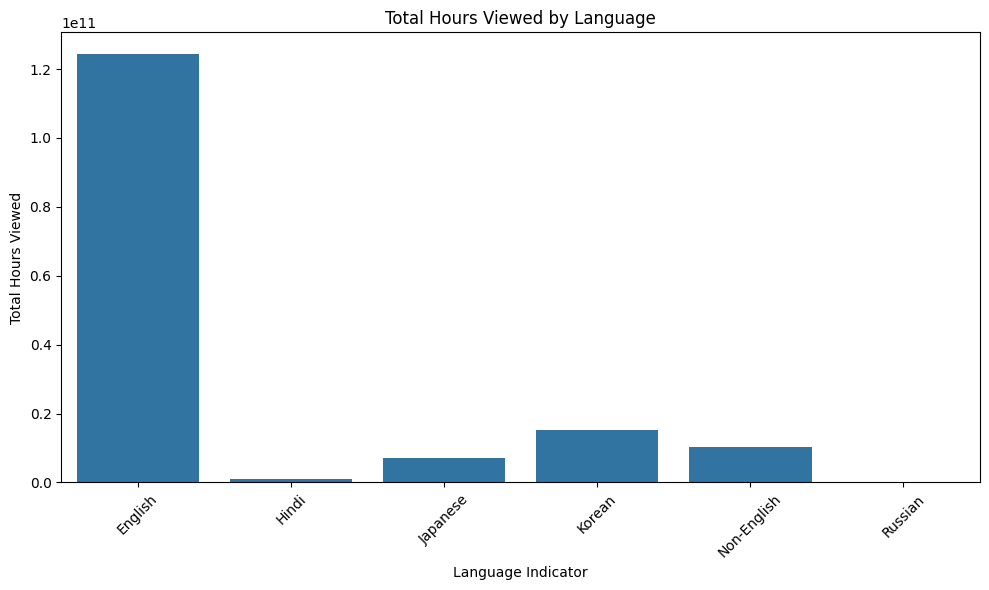

In [ ]:
#lets see hoe language and viewership relate
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate total hours viewed by language
grouped = df.groupby('Language Indicator')['Hours Viewed'].sum().reset_index()

# Plot the total hours viewed
plt.figure(figsize=(10, 6))
sns.barplot(x='Language Indicator', y='Hours Viewed', data=grouped)

plt.title("Total Hours Viewed by Language")
plt.ylabel("Total Hours Viewed")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#so english contents have more views and then korean and followed by other labguages

In [ ]:
# Group the data by 'Content Type' and 'Language Indicator',
# then calculate the mean of 'Hours Viewed' for each group
grouped = df.groupby(['Content Type', 'Language Indicator'])['Hours Viewed'].mean().reset_index()
# Convert the grouped data into a pivot table:
# - Rows are 'Language Indicator'
# - Columns are 'Content Type' (e.g., Movie, TV Show)
# - Values are average 'Hours Viewed'
pivot = grouped.pivot(index='Language Indicator', columns='Content Type', values='Hours Viewed')
pivot

Content Type,Movie,Show
Language Indicator,,
English,3.779375e+06,1.150213e+07
Hindi,2.107666e+06,3.691954e+06
Japanese,2.303734e+06,3.813595e+06
Korean,7.993467e+06,1.231058e+07
Non-English,1.675140e+06,6.180144e+06
Russian,1.200000e+06,4.966667e+06


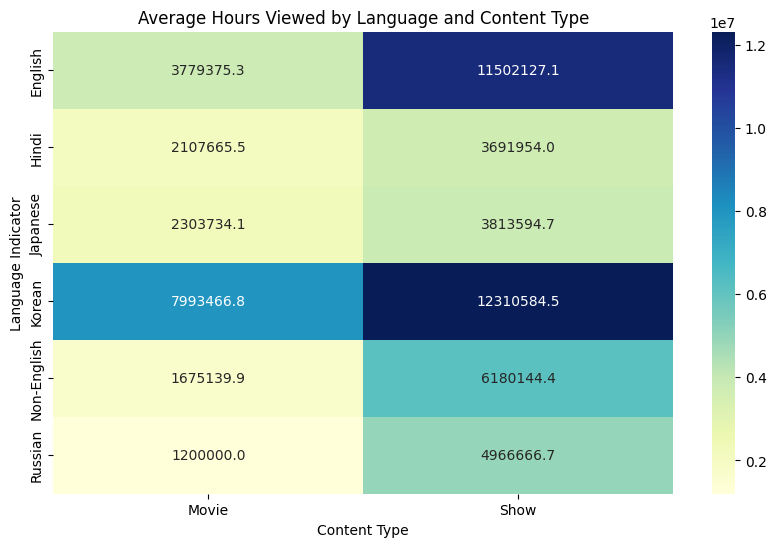

In [ ]:
#now lets visualise this pivot table using a heat map
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Average Hours Viewed by Language and Content Type')
plt.show()


In [ ]:
#here we can see that, english and korean shows have more views,
#korean movies have more than average views

In [ ]:
df.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000.0,Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,507700000.0,English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000.0,English,Movie


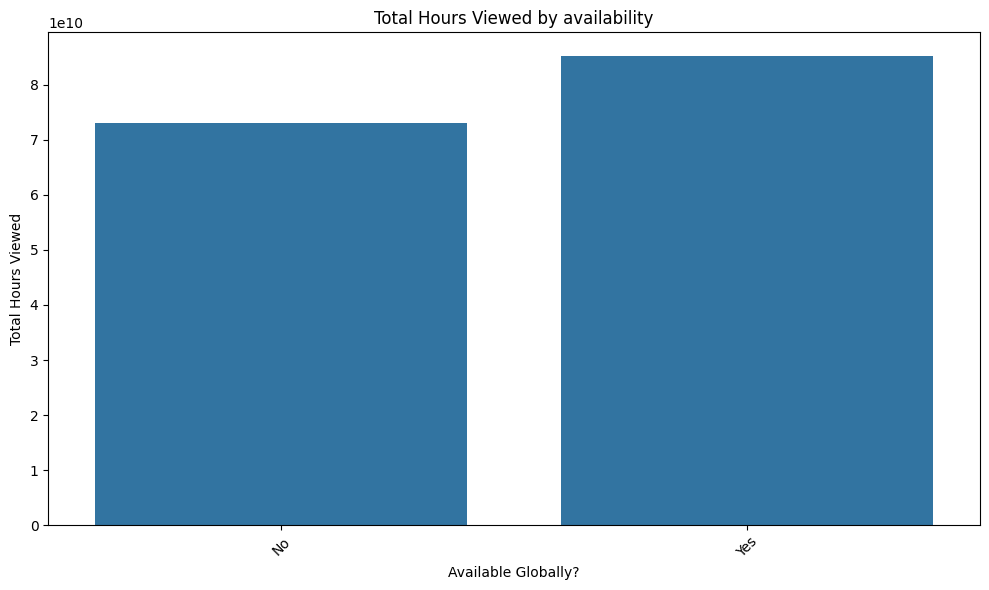

In [ ]:
#views according to global availability

import matplotlib.pyplot as plt

# Aggregate total hours viewed by language
grouped_avail = df.groupby('Available Globally?')['Hours Viewed'].sum().reset_index()

# Plot the total hours viewed
plt.figure(figsize=(10, 6))
sns.barplot(x='Available Globally?', y='Hours Viewed', data=grouped_avail)

plt.title("Total Hours Viewed by availability")
plt.ylabel("Total Hours Viewed")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#obiviously globaly available have more views but sill not much higher

In [ ]:
#lets analyse how month of year influence the views
#convert release date to datetime format
df['Release Date']=pd.to_datetime(df['Release Date'])
df['Release Month'] = df['Release Date'].dt.month

In [ ]:
# 1. Group total hours viewed by release month
grouped_month = df.groupby('Release Month')['Hours Viewed'].sum()

# 2. Optional: Sort by month
grouped_month = grouped_month.sort_index()

# 3. Plot using Plotly
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Scatter(
        x=grouped_month.index,
        y=grouped_month.values,
        mode='lines+markers',
        marker=dict(color='red'),
        line=dict(color='blue')
    )
])

fig.update_layout(
    title='Total Viewership Hours by Release Month (2023)',
    xaxis_title='Month',
    yaxis_title='Total Hours Viewed (in billions)',
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(1, 13)),
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                  'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ),
    height=600,
    width=1000
)

fig.show()


In [ ]:
#we can see here that june have a sudden peak and also the end of year shows a high peak

In [ ]:
#lets analyse
# Group total hours viewed by release month and content type
grouped_content_month = df.groupby(['Release Month', 'Content Type'])['Hours Viewed'].sum().unstack()

# Optional: Sort by month
grouped_content_month = grouped_content_month.sort_index()

# Plot using Plotly
import plotly.graph_objects as go

fig = go.Figure()

# Plot for Movies
fig.add_trace(
    go.Scatter(
        x=grouped_content_month.index,
        y=grouped_content_month['Movie'],  # Assuming 'Movie' is one of the content types
        mode='lines+markers',
        marker=dict(color='red'),
        line=dict(color='blue'),
        name='Movies'
    )
)

# Plot for Shows
fig.add_trace(
    go.Scatter(
        x=grouped_content_month.index,
        y=grouped_content_month['Show'],  # Assuming 'Show' is another content type
        mode='lines+markers',
        marker=dict(color='green'),
        line=dict(color='orange'),
        name='Shows'
    )
)

# Update layout for better visuals
fig.update_layout(
    title='Total Viewership Hours by Release Month (2023) - Movies vs Shows',
    xaxis_title='Month',
    yaxis_title='Total Hours Viewed (in billions)',
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(1, 13)),
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                  'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ),
    height=600,
    width=1000,
    legend=dict(title="Content Type")
)

fig.show()


In [ ]:
#so shows have higher views than movies

import plotly.express as px

# Group by Release Month, Content Type, and Language
grouped = df.groupby(['Release Month', 'Content Type', 'Language Indicator'])['Hours Viewed'].sum().reset_index()

# Plot using facet by Language
fig = px.line(
    grouped,
    x='Release Month',
    y='Hours Viewed',
    color='Content Type',
    facet_col='Language Indicator',
    facet_col_wrap=3,  # Change depending on number of languages
    markers=True,
    title='Viewership by Release Month, Content Type, and Language'
)

fig.update_xaxes(
    tickmode='array',
    tickvals=list(range(1, 13)),
    ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
)

fig.update_layout(
    height=800,
    width=1200
)

fig.show()


In [ ]:
#in hindi, russian, japanese  language almost shows and movies have same peaks
#but english shows more peak for shows than movie
#korean shows and movies varies peaks alternatively


In [ ]:
import plotly.graph_objects as go
import plotly.express as px

# Group total hours viewed by release month and language
grouped_content_month1 = df.groupby(['Release Month', 'Language Indicator'])['Hours Viewed'].sum().unstack()

# Sort by month
grouped_content_month1 = grouped_content_month1.sort_index()

# Set up figure
fig = go.Figure()

# Define a color palette
colors = px.colors.qualitative.Plotly  # Or use D3, Pastel, etc.

# Loop through each language and add trace
for i, lang in enumerate(grouped_content_month1.columns):
    fig.add_trace(
        go.Scatter(
            x=grouped_content_month1.index,
            y=grouped_content_month1[lang],
            mode='lines+markers',
            marker=dict(color=colors[i % len(colors)]),
            line=dict(color=colors[i % len(colors)]),
            name=lang
        )
    )

# Update layout
fig.update_layout(
    title='Total Viewership Hours by Release Month (2023) - By Language',
    xaxis_title='Month',
    yaxis_title='Total Hours Viewed (in billions)',
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(1, 13)),
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                  'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ),
    height=600,
    width=1000,
    legend_title='Language'
)

fig.show()


In [ ]:
#lets analyse how seasons influence views
#define a function to convert release months into seasons
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Unknown'

In [ ]:
#apply function to df
df['Season']= df['Release Month'].apply(month_to_season)

In [ ]:
#we can check the season column is there or not
df.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,Release Month,Season
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show,3.0,Spring
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show,1.0,Winter
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000.0,Korean,Show,12.0,Winter
3,Wednesday: Season 1,Yes,2022-11-23,507700000.0,English,Show,11.0,Fall
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000.0,English,Movie,5.0,Spring


In [ ]:
#let Group by season
season_group = df.groupby('Season')['Hours Viewed'].sum()
season_group

,Hours Viewed
Season,
Fall,2.313490e+10
Spring,2.139740e+10
Summer,2.186460e+10
Unknown,6.757390e+10
Winter,2.443110e+10


In [ ]:
# Ensure correct seasonal order
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
season_group = season_group.reindex(season_order)
season_group.head()

,Hours Viewed
Season,
Winter,2.443110e+10
Spring,2.139740e+10
Summer,2.186460e+10
Fall,2.313490e+10


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Scatter(
        x=season_group.index,  # ['Winter', 'Spring', 'Summer', 'Fall']
        y=season_group.values,
        mode='lines+markers',
        marker=dict(color='red'),
        line=dict(color='blue')
    )
])

fig.update_layout(
    title='Total Viewership Hours by Season (2023)',
    xaxis_title='Season',
    yaxis_title='Total Hours Viewed (in billions)',
    xaxis=dict(
        categoryorder='array',
        categoryarray=season_order
    ),
    height=600,
    width=1000
)

fig.show()


In [ ]:
season_grp_bar = df.groupby('Season')['Hours Viewed'].sum().reset_index()
season_grp_bar

,Season,Hours Viewed
0,Fall,2.313490e+10
1,Spring,2.139740e+10
2,Summer,2.186460e+10
3,Unknown,6.757390e+10
4,Winter,2.443110e+10


<ipython-input-36-3ccb5cc833cf>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




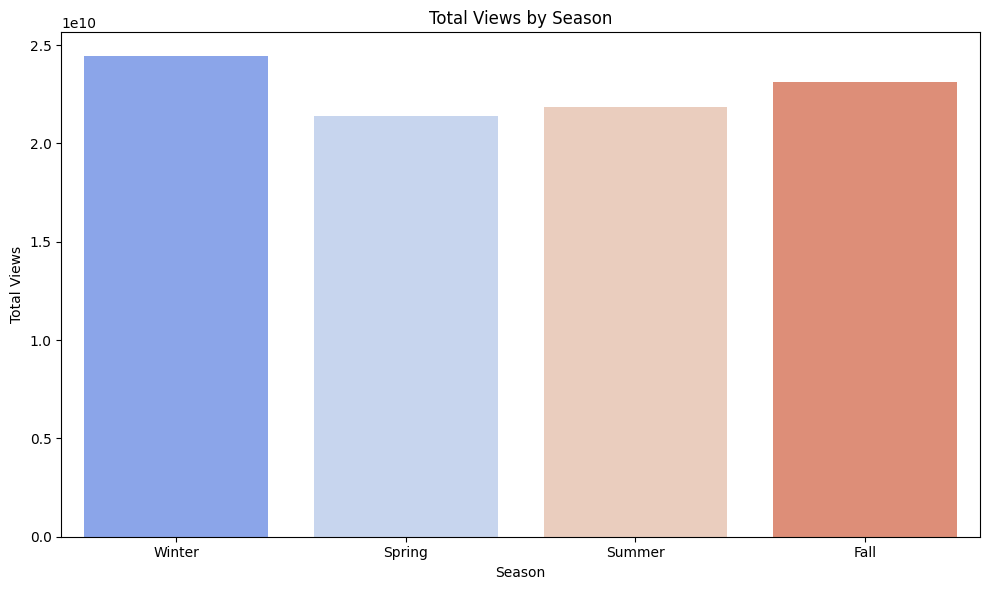

In [ ]:
#analyse by season and views
#Plot total views per season
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Hours Viewed', data=season_grp_bar, order=['Winter', 'Spring', 'Summer', 'Fall'], palette='coolwarm')
plt.title('Total Views by Season')
plt.ylabel('Total Views')
plt.xlabel('Season')
plt.tight_layout()
plt.show()

In [ ]:
#so winter have a hogh peank and then fall have high peank

In [ ]:
import plotly.graph_objects as go

# Assuming 'netflix_data' is already loaded and contains the columns 'Release Month' and 'Hours Viewed'

# Get monthly releases and viewership
monthly_releases = df['Release Month'].value_counts().sort_index()
monthly_viewership = df.groupby('Release Month')['Hours Viewed'].sum()

# Create figure
fig = go.Figure()

# Bar trace for the number of releases
fig.add_trace(
    go.Bar(
        x=monthly_releases.index,
        y=monthly_releases.values,
        name='Number of Releases',
        marker_color='royalblue',  # A more refined blue color
        opacity=0.8,
        yaxis='y1',
        hovertemplate='Releases: %{y}',  # Tooltip with release count
    )
)

# Scatter trace for the viewership hours (with a different color)
fig.add_trace(
    go.Scatter(
        x=monthly_viewership.index,
        y=monthly_viewership.values,
        name='Viewership Hours',
        mode='lines+markers',
        line=dict(color='orangered', dash='dot', width=3),  # Dashed orange-red line
        marker=dict(color='orangered', size=10, line=dict(width=2, color='darkred')),
        yaxis='y2',
        hovertemplate='Viewership: %{y} hours',  # Tooltip with viewership hours
    )
)

# Update layout
fig.update_layout(
    title='Monthly Release Patterns and Viewership Hours (2023)',
    xaxis=dict(
        title='Month',
        tickmode='array',
        tickvals=list(range(1, 13)),
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
        showgrid=True,  # Add gridlines for better readability
        zeroline=False
    ),
    yaxis=dict(
        title='Number of Releases',
        showgrid=True,
        gridcolor='rgba(220, 220, 220, 0.5)',  # Subtle gridlines for the primary y-axis
        side='left'
    ),
    yaxis2=dict(
        title='Total Hours Viewed (in billions)',
        overlaying='y',
        side='right',
        showgrid=False  # No grid for the secondary y-axis
    ),
    legend=dict(
        x=1.05,
        y=1,
        orientation='v',
        xanchor='left',
        yanchor='top'
    ),
    height=600,
    width=1000,
    template='plotly_white'  # Clean and modern white theme
)

# Show the plot
fig.show()


In [ ]:
#count of release over the year have not much influence on viewership

In [ ]:
df['Release Day'] = df['Release Date'].dt.day_name()

weekday_releases = df['Release Day'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# aggregate viewership hours by day of the week
weekday_viewership = df.groupby('Release Day')['Hours Viewed'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=weekday_releases.index,
        y=weekday_releases.values,
        name='Number of Releases',
        marker_color='red',
        opacity=0.6,
        yaxis='y1'
    )
)

fig.add_trace(
    go.Scatter(
        x=weekday_viewership.index,
        y=weekday_viewership.values,
        name='Viewership Hours',
        mode='lines+markers',
        marker=dict(color='blue'),
        line=dict(color='blue'),
        yaxis='y2'
    )
)

fig.update_layout(
    title='Weekly Release Patterns and Viewership Hours (2023)',
    xaxis=dict(
        title='Day of the Week',
        categoryorder='array',
        categoryarray=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    ),
    yaxis=dict(
        title='Number of Releases',
        showgrid=False,
        side='left'
    ),
    yaxis2=dict(
        title='Total Hours Viewed (in billions)',
        overlaying='y',
        side='right',
        showgrid=False
    ),
    legend=dict(
        x=1.05,
        y=1,
        orientation='v',
        xanchor='left'
    ),
    height=600,
    width=1000
)

fig.show()

In [ ]:
#when it comes to days of weeks friday shows a peak in release count and views also

In [ ]:
'''New Year's Day (January 1)

Valentine's Day (February 14)

St. Patrick's Day (March 17)

Independence Day (July 4)

Christmas (December 25)'''

"New Year's Day (January 1)\n\nValentine's Day (February 14)\n\nSt. Patrick's Day (March 17)\n\nIndependence Day (July 4)\n\nChristmas (December 25)"

In [ ]:
holidays = ['2023-01-01',
        '2023-02-14',
        '2023-03-17',
        '2023-07-04',
        '2023-10-31',
        '2023-12-25'
]

In [ ]:
# convert to datetime
holidays_dates = pd.to_datetime(holidays)

#releases on holidays and days around holidays
holiday_releases = df[df['Release Date'].apply(
    lambda x: any((x - date).days in range(-3, 4) for date in holidays_dates)
)]


holiday_viewership = holiday_releases.groupby('Release Date')['Hours Viewed'].sum()
holiday_viewership


,Hours Viewed
Release Date,
2022-12-29,6.070000e+07
2022-12-30,1.352300e+09
2022-12-31,1.062000e+08
2023-01-01,2.816000e+08
2023-01-04,9.000000e+07
2023-02-13,3.870000e+07
2023-02-14,3.912000e+08
2023-02-15,3.494000e+08
2023-02-16,3.660000e+07


In [ ]:
holiday_releases[['Title', 'Release Date', 'Hours Viewed']]

,Title,Release Date,Hours Viewed
2,The Glory: Season 1 // 더 글로리: 시즌 1,2022-12-30,622800000.0
6,La Reina del Sur: Season 3,2022-12-30,429600000.0
11,Kaleidoscope: Limited Series,2023-01-01,252500000.0
25,Shadow and Bone: Season 2,2023-03-16,192900000.0
29,Perfect Match: Season 1,2023-02-14,176800000.0
...,...,...,...
22327,Aggretsuko: Season 5 // アグレッシブ烈子: シーズン5,2023-02-16,900000.0
22966,The Lying Life of Adults: Limited Series // La...,2023-01-04,900000.0
22985,Community Squad: Season 1 // División Palermo:...,2023-02-17,800000.0
24124,Ariyoshi Assists: Season 1 // 名アシスト有吉: シーズン1,2023-03-14,400000.0


In [ ]:
#now lets check which are top 10 the highest viewed contents
df.nlargest(10,'Hours Viewed')

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,Release Month,Season,Release Day
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show,3.0,Spring,Thursday
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show,1.0,Winter,Thursday
18227,King the Land: Limited Series // 킹더랜드: 리미티드 시리즈,Yes,2023-06-17,630200000.0,Korean,Movie,6.0,Summer,Saturday
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000.0,Korean,Show,12.0,Winter,Friday
18214,ONE PIECE: Season 1,Yes,2023-08-31,541900000.0,English,Show,8.0,Summer,Thursday
3,Wednesday: Season 1,Yes,2022-11-23,507700000.0,English,Show,11.0,Fall,Wednesday
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000.0,English,Movie,5.0,Spring,Thursday
5,You: Season 4,Yes,2023-02-09,440600000.0,English,Show,2.0,Winter,Thursday
6,La Reina del Sur: Season 3,No,2022-12-30,429600000.0,English,Show,12.0,Winter,Friday
7,Outer Banks: Season 3,Yes,2023-02-23,402500000.0,English,Show,2.0,Winter,Thursday


In [ ]:
#The Glory: Season 1 // 더 글로리: 시즌 1 and La Reina del Sur: Season 3 are released near holidays and occupy among top 10 most viewed contents
#for valentines day also they released a romatic theme content Perfect Match: Season 1	that increase the viewerships

In [ ]:
#conclusions

#1.Netflix’s content strategy is centered on maximizing viewership through strategic release timing and a diverse content mix.
#2.Series consistently generate higher engagement than movies.
#3.English shows have a high peak for both movies and shows than any other languages, and second peak is for korean shows and movies.
#4.Notable spikes in viewership during December and June—suggesting intentional scheduling around holiday periods.
#5. The start of winter and end of fall season emerges as a peak window for audience engagement.
#6. Releases are heavily concentrated on Fridays, aligning with consumer behavior and maximizing weekend viewership potential.
#7. While the volume of releases remains relatively consistent throughout the year,
#      fluctuations in viewership indicate a deliberate emphasis on high-impact titles and well-timed launches rather than relying on quantity alone.
